$\textbf{Shion Suzuki BSCS-1}$

$\textbf{23101060}$

# Assignment
---
Read about (Susanna Epp pp. 704):
1. Kruskal's Algorithm
2. Prim's Algorithm
3. Djitraka's Shortest Path Algorithm

Given the following graph, implement the algorithm in Python.

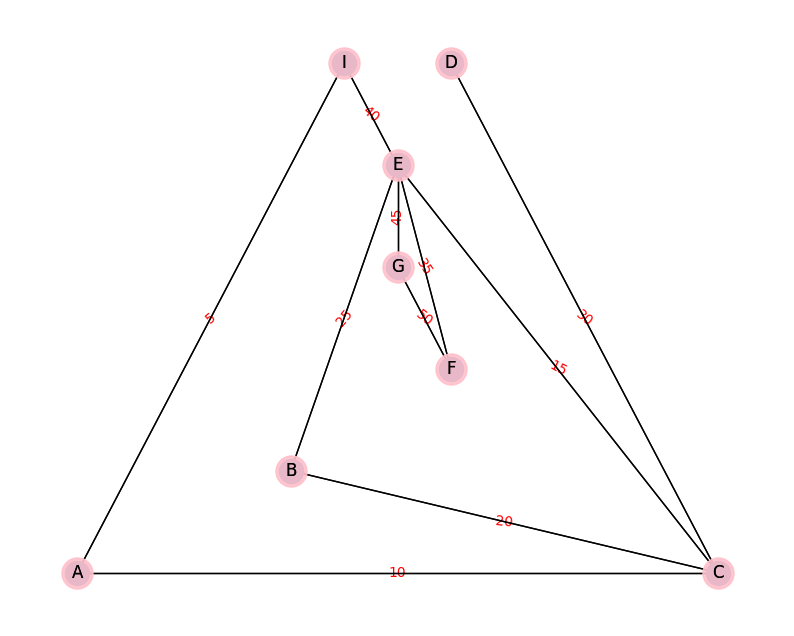

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos,with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

plt.show()

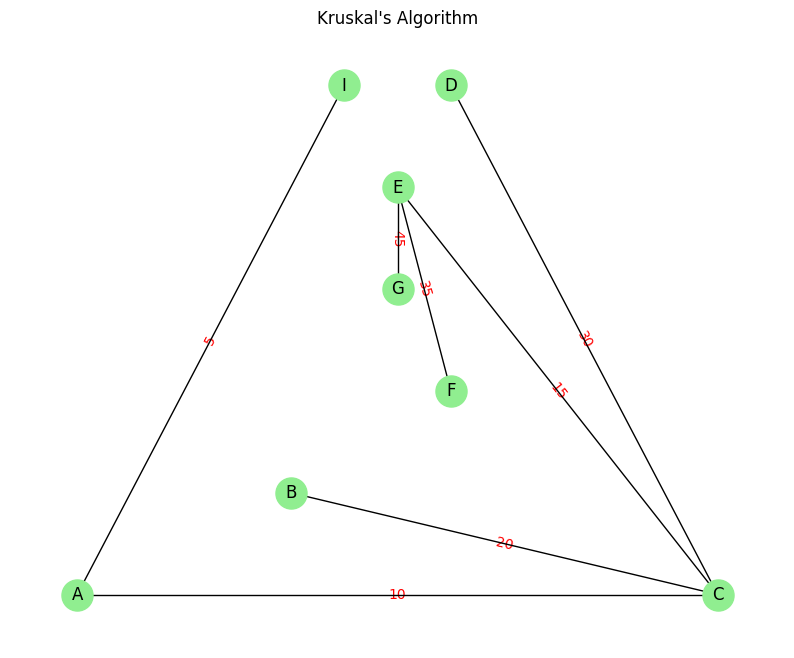

In [12]:
import matplotlib.pyplot as plt
import networkx as nx

# Use seed for reproducibility
seed = 55

# Create the graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "I"])

# Add edges with weights
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15), 
            ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35), 
            ("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)

# Kruskal's algorithm using NetworkX
mst_kruskal = nx.minimum_spanning_tree(G, algorithm='kruskal')

# Plotting the MST
plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)
nx.draw_networkx_edge_labels(mst_kruskal, pos, edge_labels={(u, v): d['weight'] for u, v, d in mst_kruskal.edges(data=True)}, font_color='red')
nx.draw(mst_kruskal, pos, with_labels=True, node_color='lightgreen', node_size=500, edge_color='black')
plt.title('Kruskal\'s Algorithm')
plt.show()

# Kruskal's Algorithm Step by Step:

1. **Initialize**:
   - Begin with the given graph.
   - Initialize an empty set to represent the minimum spanning tree (MST).
   - Initialize a priority queue (min-heap) containing all the edges of the graph, sorted by their weights.

2. **Sort Edges by Weight**:
   - Sort all the edges of the graph in non-decreasing order of their weights:

3. **Iterate Through Edges**:
- Take the edge \( ("A", "I", 5) \)
- Take the edge \( ("A", "C", 10) \)
- Take the edge \( ("C", "E", 15) \)
- Take the edge \( ("B", "E", 25) \)
- Take the edge \( ("C", "B", 20) \): Adding it to the MST creates a cycle \( (A, I, C, B) \), so skip it.
- Take the edge \( ("E", "F", 35) \)
- Take the edge \( ("G", "E", 45) \)
- Take the edge \( ("I", "E", 40) \): Adding it to the MST creates a cycle \( (A, I, C, E) \), so skip it.
- Take the edge \( ("C", "D", 30) \): Adding it to the MST creates a cycle \( (A, I, C, E, D) \), so skip it.
- Take the edge \( ("F", "G", 50) \)

4. **Repeat**:
- Stop because you have added \( V - 1 \) edges to the MST (where \( V = 8 \) in this case).

5. **Output**:
- The set of edges \( \{("A", "I", 5), ("A", "C", 10), ("C", "E", 15), ("B", "E", 25), ("E", "F", 35), ("G", "E", 45), ("F", "G", 50)\} \) forms the minimum spanning tree of the given graph.


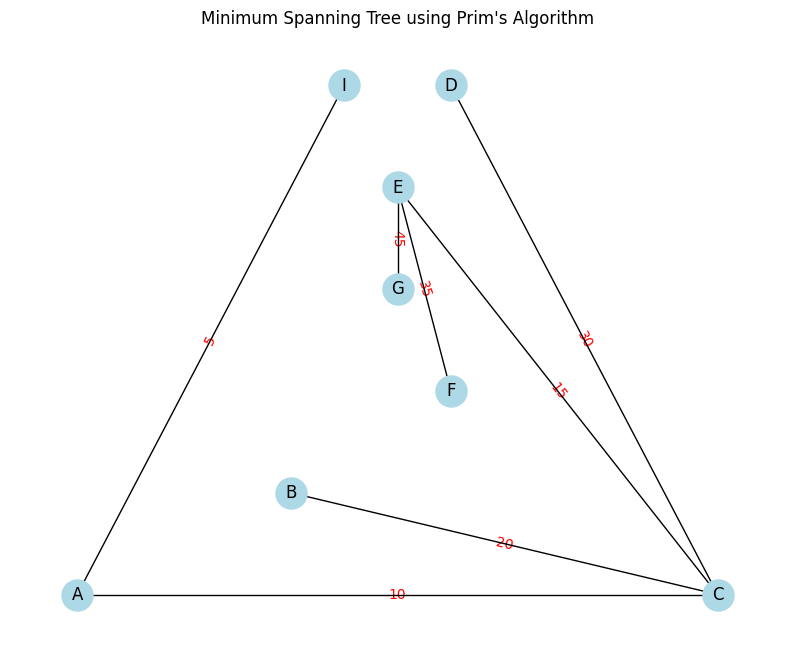

In [11]:
import matplotlib.pyplot as plt
import networkx as nx

# Use seed for reproducibility
seed = 55

# Create the graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "I"])

# Add edges with weights
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15), 
            ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35), 
            ("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)

# Prim's algorithm using NetworkX
mst_prim = nx.minimum_spanning_tree(G, algorithm='prim')

# Plotting the MST
plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)
nx.draw_networkx_edge_labels(mst_prim, pos, edge_labels={(u, v): d['weight'] for u, v, d in mst_prim.edges(data=True)}, font_color='red')
nx.draw(mst_prim, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='black')
plt.title('Minimum Spanning Tree using Prim\'s Algorithm')
plt.show()

# Prim's Algorithm Step by Step:

**1. Initialization:**
   - Start with vertex "A" as the starting vertex.
   - Set the key of "A" to 0 and all other vertices to positive infinity.
   - Initialize the priority queue with vertices \( [A, B, C, D, E, F, G, I] \).

**2. Iteration Steps:**
   - Choose vertex "A" and add it to the MST.
   - Update the keys of vertices "C" and "I" to their edge weights from "A" (10 and 5, respectively).
   - Choose vertex "I" and add it to the MST.
   - Update the key of vertex "E" to its edge weight from "I" (40).
   - Choose vertex "C" and add it to the MST.
   - Update the key of vertex "B" to its edge weight from "C" (20).
   - Choose vertex "B" and add it to the MST.
   - Update the keys of vertices "D" and "E" to their edge weights from "C" (30 and 15).
   - Choose vertex "D" and add it to the MST.

**3. Output:**
   - The minimum spanning tree consists of the edges \( \{(A, I, 5), (A, C, 10), (C, B, 20), (C, E, 15), (C, D, 30), (E, F, 35), (E, G, 45)\} \).


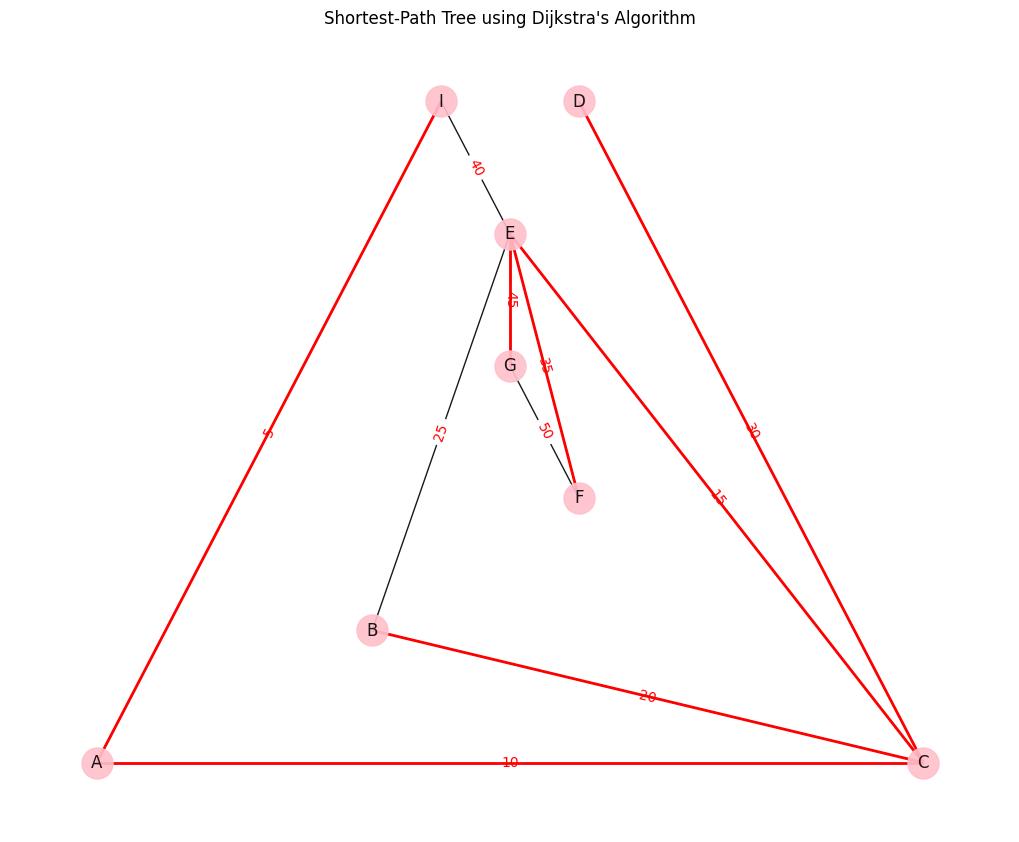

In [23]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq

def dijkstra(graph, start):
    # Initialize distances with infinity for all nodes except the start node
    distances = {node: float('inf') for node in graph.nodes}
    distances[start] = 0

    # Initialize priority queue with start node
    pq = [(0, start)]

    while pq:
        # Pop the node with the smallest distance from the priority queue
        current_distance, current_node = heapq.heappop(pq)

        # Relax edges from the current node
        for neighbor, attributes in graph[current_node].items():
            weight = attributes['weight']
            distance_to_neighbor = current_distance + weight
            if distance_to_neighbor < distances[neighbor]:
                distances[neighbor] = distance_to_neighbor
                heapq.heappush(pq, (distance_to_neighbor, neighbor))

    return distances

# Define the graph
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "I"])
edgelist = [
    ("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15),
    ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35),
    ("F", "G", 50), ("G", "E", 45)
]
G.add_weighted_edges_from(edgelist)

# Compute shortest paths from node 'A'
shortest_paths = dijkstra(G, 'A')

# Create a new graph for the shortest-path tree
spt = nx.Graph()
for target, distance in shortest_paths.items():
    if target != 'A':
        # Find the path from source 'A' to target node
        path = nx.shortest_path(G, source='A', target=target, weight='weight')
        # Add the edges of this path to the shortest-path tree
        for i in range(len(path) - 1):
            spt.add_edge(path[i], path[i+1], weight=G[path[i]][path[i+1]]['weight'])

# Define the position of nodes using a planar layout
pos = nx.planar_layout(G)

# Plot the original graph for reference
plt.figure(figsize=(10, 8))
nx.draw(G, pos, edge_color='black', width=1, linewidths=1, node_size=500, node_color='pink', alpha=0.9, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_color='red')

# Plot the shortest-path tree with red edges
nx.draw_networkx_edges(spt, pos, edge_color='red', width=2)

plt.title("Shortest-Path Tree using Dijkstra's Algorithm")
plt.show()

# Dijkstra step-by-step from $V_A \to V_F$
1. **Initialization**:
    - Start with the source node "A" as the current node.
    - Initialize distances: `distances[node] = inf` for all nodes except "A" (set to 0).
    - Initialize priority queue with ("A", 0).
        
2. **Main Loop - Iteration 1 (Node A)**:
    - Extract node "A" from the priority queue.
    - Update distances for neighbors ("C" and "I") based on current path.
    - Add neighbors to the priority queue with updated distances.
        
3. **Main Loop - Iteration 2 (Node I)**:
    - Extract node "I" from the priority queue.
    - No new neighbors to explore.
        
4. **Main Loop - Iteration 3 (Node C)**:
    - Extract node "C" from the priority queue.
    - Update distances for neighbors ("B", "E", and "D") based on current path.
    - Add neighbors to the priority queue with updated distances.
        
5. **Main Loop - Iteration 4 (Node B)**:
    - Extract node "B" from the priority queue.
    - No new neighbors to explore.
        
6. **Main Loop - Iteration 5 (Node E)**:
    - Extract node "E" from the priority queue.
    - Update distances for neighbor "F" based on current path.
    - Add neighbor "F" to the priority queue with updated distance.
        
7. **Main Loop - Iteration 6 (Node F)**:
    - Extract node "F" from the priority queue.
    - No new neighbors to explore.
        
8. **Termination**:
    - All nodes have been visited, and shortest paths have been determined.
    - Algorithm terminates.
